<a href="https://colab.research.google.com/github/vmagal1/EbacRepositorio/blob/main/Mod%2018%20ex%201.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regressão Logística I
## Tarefa I

Neste exercício vamos trabalhar com a base "Heart Disease Data Set" disponível no site do [UCI](https://archive.ics.uci.edu/ml/datasets/heart+disease).

Temos 303 indivíduos e vamos utilizar 13 variáveis disponíveis para prever a presença de doença cardíaca na variável ```num```(a 14$^a$ variável).

A descrição das variáveis está recortada abaixo:
- age: idade do paciente em anos
- sex: sexo (1 = male; 0 = female)  
- cp: tipo de dor no peito
  - 1: angina típica
  - 2: angina atípica
  - 3: dor não-angina
  - 4: assintomático
- trestbps: pressão sanguínea em repouso (em mm Hg na admissão ao hospital
- chol: colesterol sérico em mg/dl
- fbs: (açúcar no sangue em jejum > 120 mg/dl) (1 = True; 0 = False)
- restecg: resultados eletrocardiográficos em repouso
  - 0: normal
  - 1: tendo anormalidade da onda ST-T (Inversões de onda T e / ou ST com elevação ou depressão de > 0.05 mV)
  - 2: mostrando hipertrofia ventricular esquerda provável ou definitiva pelos critérios de Estes
- thalach: frequência cardíaca máxima alcançada
- exang: angina induzida por exercício(1 = sim; 0 = não)
- oldpeak = Depressão de ST induzida por exercício em relação ao repouso
- slope: Depressão de ST induzida por exercício em relação ao repouso
  - 1: inclinação ascendente
  - 2: estável
  - 3: inclinação descendente
- ca: número de vasos principais (0-3) coloridos por fluorosopia
- thal: 3 = normal; 6 = defeito corrigido; 7 = defeito reversível
- num: diagnóstico de doença cardíaga (status de doença angiográfica)

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import statsmodels.formula.api as smf

In [ ]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data'

df = pd.read_csv(url,
                 names=['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
                        'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'])
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [ ]:
df['flag_doente'] = (df['num'] != 0).astype('int64')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,flag_doente
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2,1
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3,1
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1,1


1. Monte uma bivariada para a variável ```sex``` com as seguintes estatísticas:

- Número de *saudáveis*
- Número de *doentes*
- Total
- Quantidade média de doentes
- *Odds*
- *Odds ratio* (Use o total como referência)
- Logito (LOG(*Odds*))
- O LOG do *Odds ratio* (com o total como referência) é chamado de *Weight of Evidence* (WOE). Calcule-o.

In [ ]:
tab = pd.crosstab(df['sex'], df['flag_doente'], margins=True)
tab.columns = ['Saudaveis', 'Doente', 'Total']
tab.index = ['Masculino', 'Feminino', 'Total']
tab

,Saudaveis,Doente,Total
Masculino,72,25,97
Feminino,92,114,206
Total,164,139,303


In [ ]:
tab['% Doentes'] = tab['Doente'] / tab['Total']
tab['% Saudáveis'] = tab['Saudaveis'] / tab['Total']
tab

,Saudaveis,Doente,Total,% Doentes,% Saudáveis
Masculino,72,25,97,0.257732,0.742268
Feminino,92,114,206,0.553398,0.446602
Total,164,139,303,0.458746,0.541254


In [ ]:
odds = tab['Saudaveis']['Total'] / tab['Doente']['Total']
odds

1.1798561151079137

In [ ]:
logodds = np.log(odds)
logodds

0.16539249469350667

In [ ]:
tab['Odds'] = tab['Doente'] / tab['Saudaveis']
tab

,Saudaveis,Doente,Total,% Doentes,% Saudáveis,Odds
Masculino,72,25,97,0.257732,0.742268,0.347222
Feminino,92,114,206,0.553398,0.446602,1.239130
Total,164,139,303,0.458746,0.541254,0.847561


2. Monte uma bivariada para a variável ```age``` com as seguintes estatísticas:
- Categorize a variável em 5 grupos
- Calcule as mesmas quantidades calculadas no execício anterior
- Calcule também o valor médio da variável ```age```

In [ ]:
pd.cut(df['age'], 5)  # Categorizando a variável em 5 grupos
tab2 = pd.crosstab(pd.cut(df['age'], 5), df['flag_doente'], margins=True)
tab2.columns = ['Saudaveis', 'Doente', 'Total']
tab2

,Saudaveis,Doente,Total
age,,,
"(28.952, 38.6]",8,3,11
"(38.6, 48.2]",50,21,71
"(48.2, 57.8]",56,41,97
"(57.8, 67.4]",40,67,107
"(67.4, 77.0]",10,7,17
All,164,139,303


In [ ]:
tab2['% Doentes'] = tab2['Doente'] / tab2['Total']
tab2['% Saudáveis'] = tab2['Saudaveis'] / tab2['Total']
tab2

,Saudaveis,Doente,Total,% Doentes,% Saudáveis
age,,,,,
"(28.952, 38.6]",8,3,11,0.272727,0.727273
"(38.6, 48.2]",50,21,71,0.295775,0.704225
"(48.2, 57.8]",56,41,97,0.422680,0.577320
"(57.8, 67.4]",40,67,107,0.626168,0.373832
"(67.4, 77.0]",10,7,17,0.411765,0.588235
All,164,139,303,0.458746,0.541254


3. Visualize a informação da bivariada construída acima através de um gráfico da sua escolha.

<Axes: xlabel='age', ylabel='% Doentes'>

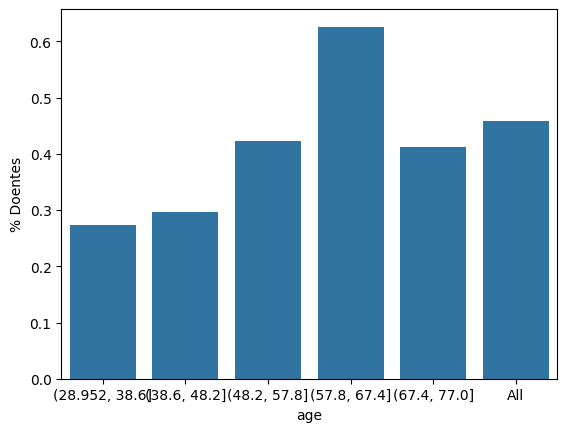

In [ ]:
sns.barplot(x=tab2.index, y=tab2['% Doentes'], data=tab2)

<Axes: xlabel='None', ylabel='% Doentes'>

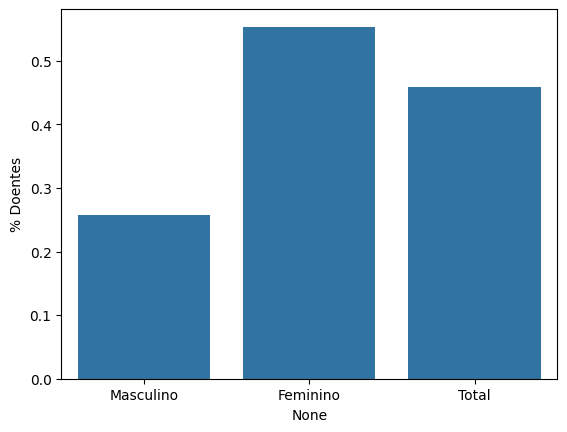

In [ ]:
sns.barplot(x=tab.index, y=tab['% Doentes'], data=tab)